In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [260]:
review_df = pd.read_csv(r'C:\\Users/34649/OneDrive/Escritorio/Cursos/Udemy/Proyctos reales Data Science/Sección 6 Departamento de Relaciones Públicas/amazon_alexa.tsv',sep="\t")

review_df
review_df.info()
review_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

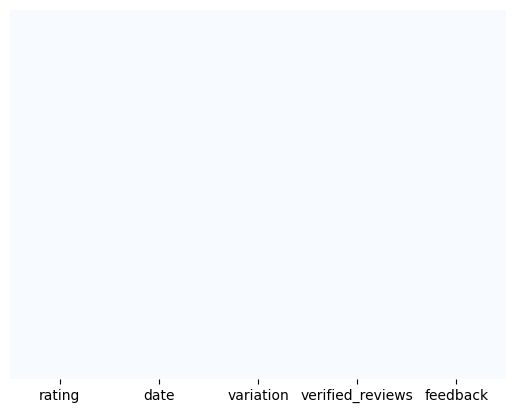

In [261]:
# HEAT MAP TO DETERMINATE N/A

sns.heatmap(review_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")
review_df.isnull().sum()


array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'feedback'}>]], dtype=object)

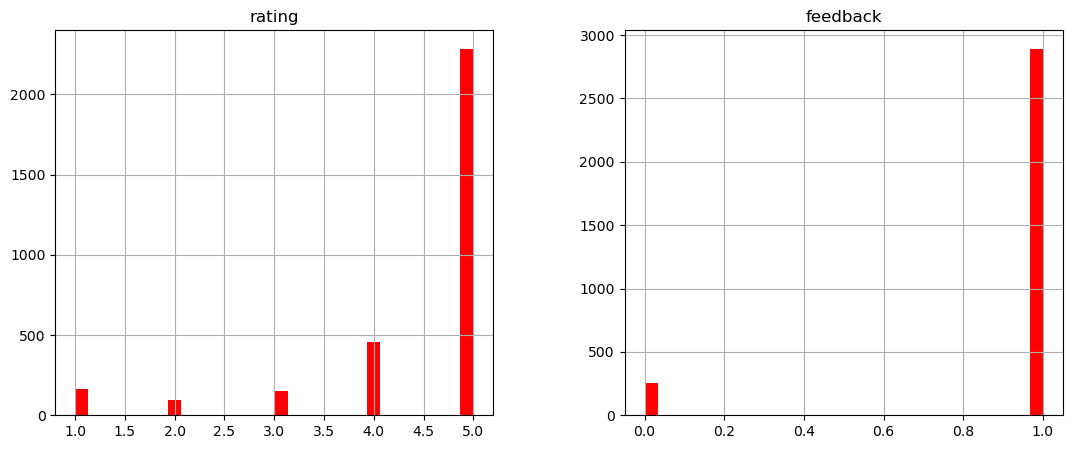

In [262]:
#Dataset Balance

review_df.hist(bins = 30, figsize=(13,5),color="r")

<AxesSubplot:ylabel='Frequency'>

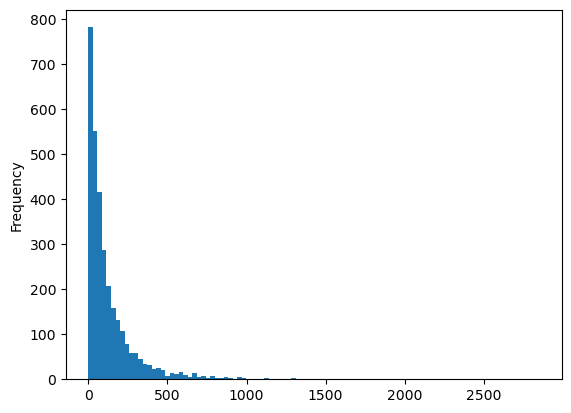

In [263]:
# Apply reviews length

review_df["length"] = review_df["verified_reviews"].apply(len)
review_df.head()

# Long tail distribution on reviews

review_df["length"].plot(bins = 100 , kind = "hist")

c:\Users\34649\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

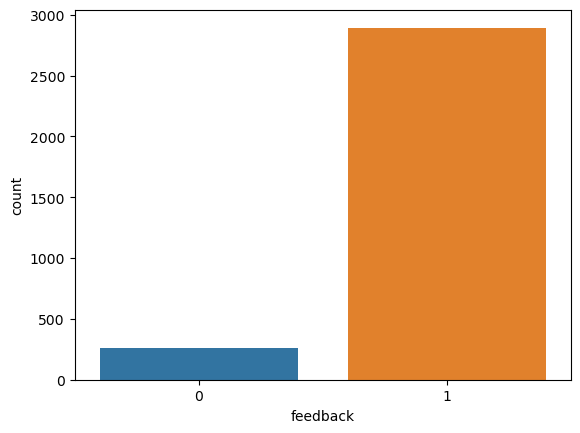

In [264]:
positive = review_df[review_df["feedback"] == 1]
negative = review_df[review_df["feedback"] == 0]

sns.countplot(review_df["feedback"], label = "Count")


c:\Users\34649\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

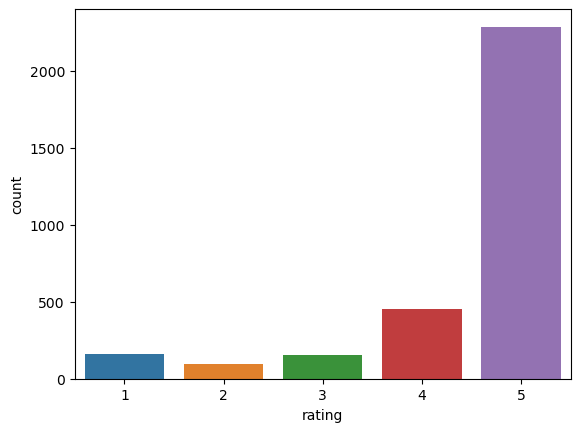

In [265]:
sns.countplot(review_df["rating"], label = "Count")


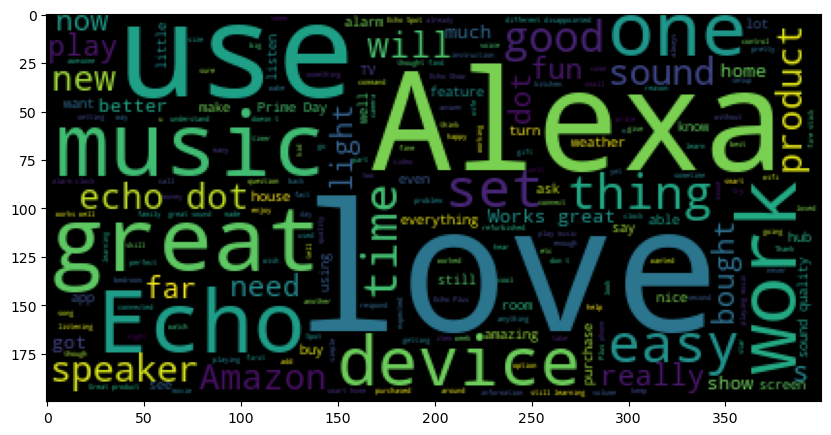

In [266]:
#WordCloud
sentences = review_df["verified_reviews"].tolist()
sentences_as_one_string = " ".join(sentences)

from wordcloud import WordCloud
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sentences_as_one_string))




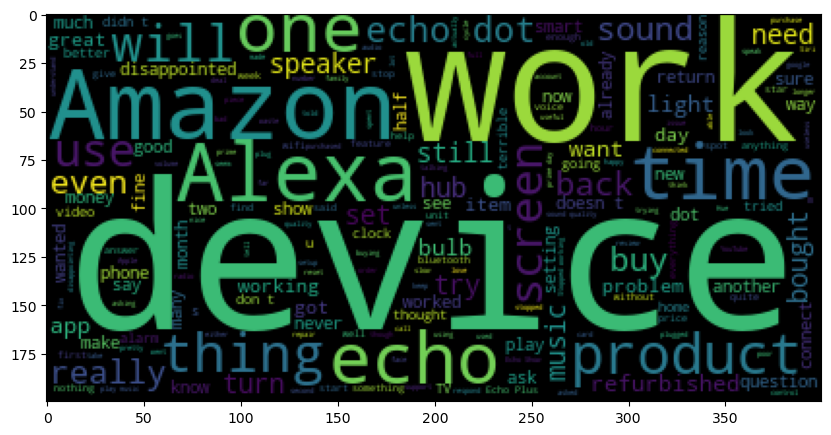

In [267]:
# negative WordCloud

negative_list = negative["verified_reviews"].tolist()
negative_as_one_string = " ".join(negative_list)


plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(negative_as_one_string))


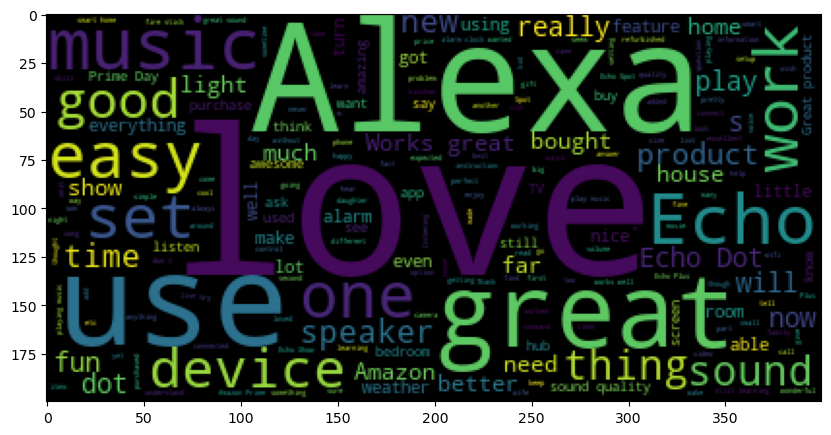

In [268]:
# Positive WordCloud

positive_list = positive["verified_reviews"].tolist()
positive_as_one_string = " ".join(positive_list)


plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(positive_as_one_string))

In [269]:
# Data Cleaning

review_df.drop(["date","rating", "length"], axis = 1, inplace=True)
variation_dummies = pd.get_dummies(review_df["variation"], drop_first=True)
review_df.drop(["variation"], axis = 1, inplace=True)
review_df = pd.concat([review_df, variation_dummies], axis = 1)
review_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [270]:
# Tokenization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer= message_cleaning)

# function analyzer = Message_clean

''''import string
string.punctuation

import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
stopwords.words("english")


def message_cleaning(message):
    test_punc_removed = [ chart for chart in message if chart not in string.punctuation]

    test_punc_removed_join= "".join(test_punc_removed)
    test_punc_removed_join_clean = [word for word in test_punc_removed_join.split() if word.lower() is not stopwords.words("english")]
    return test_punc_removed_join_clean

review_df_clean = review_df["verified_reviews"].apply(message_cleaning)'''

reviews_countvectorizer = vectorizer.fit_transform(review_df["verified_reviews"])

print(vectorizer.get_feature_names())


['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

c:\Users\34649\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [271]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [272]:
# Create Dataframe vectorized

review_df.drop(["verified_reviews"],axis = 1 , inplace= True)
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
reviews_df =pd.concat([review_df, reviews], axis = 1)
reviews_df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5458,5459,5460,5461,5462,5463,5464,5465,5466,5467
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
# X = review_df.drop(["feedback"], axis = 1)
X = reviews
y = review_df["feedback"]


In [282]:
# Model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from imblearn.combine import SMOTETomek
os_us = SMOTETomek(random_state=52)
X_train, y_train = os_us.fit_resample(X_train, y_train)

from sklearn.naive_bayes import MultinomialNB

nb_multinomial = MultinomialNB()
nb_multinomial.fit(X_train,y_train)

MultinomialNB(alpha=1.0,class_prior=None , fit_prior=True)

MultinomialNB()

0.9633027522935779


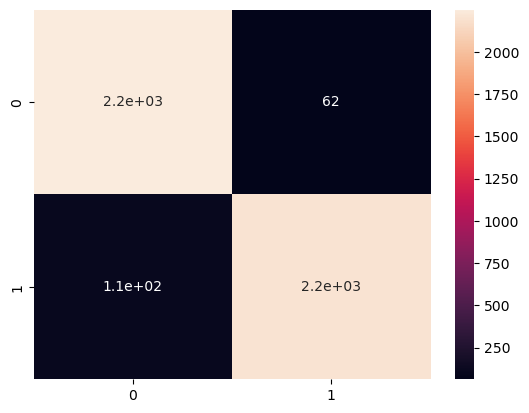

In [283]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

y_predict_train = nb_multinomial.predict(X_train)
y_predict_train

cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

f_score = f1_score(y_train, y_predict_train)
print(f_score)

0.9375549692172384


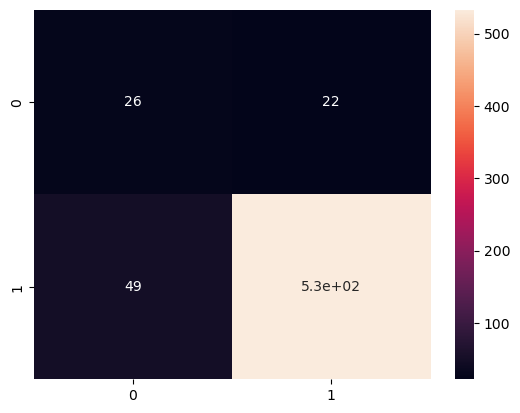

In [284]:
y_predict_test = nb_multinomial.predict(X_test)
y_predict_test

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

f_score = f1_score(y_test, y_predict_test)
print(f_score)

In [285]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.35      0.54      0.42        48
           1       0.96      0.92      0.94       582

    accuracy                           0.89       630
   macro avg       0.65      0.73      0.68       630
weighted avg       0.91      0.89      0.90       630

